<a href="https://colab.research.google.com/github/mhamzaraheel/pytorch_DeepLearning/blob/main/NooteBooks/2_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# PyTorch Workflow

### How Model Training Works?

<p align= "justify">
The model training process involves feeding large datasets with input-output pairs into the neural network, adjusting its internal parameters (weights and biases) through backpropagation to minimize the difference between predicted and actual outputs. This iterative optimization refines the model's ability to generalize patterns and make accurate predictions, enhancing its performance over time.


<p align= "justify">

> The essence of machine learning and deep learning is to take some data , build an algorithm/neural etwork model to train(discover patterns) in it and use the trained model for future prediction.
</p>

<p align= "justify">

*But let's start small. In this wole session we will start with the straight line as our data.*
</p>

<p align= "justify">
We will bulid a PyTorch model that takes the line as data and we will train the model on it , the model learns the pattern of the straight line and matches it.
</p>

In [1]:
# <p align= "justify">

## 1.Setup

Let's start imporitng the necessary modules/libraries.


We're going to import `nn` (nn stand for neural network),    `torch.nn`is a module in the PyTorch library that provides classes for building and training neural networks. It includes predefined layers, loss functions, and optimization algorithms, making it a powerful tool for implementing and experimenting with deep learning models. and `matplotlib` for visualization.


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 2.Data Preparing


In machine learning, **data** refers to the information or observations that a model uses to learn patterns, make predictions, or perform a task. This data can take various forms, including numerical values, text, images, audio, or a combination of these. The quality and quantity of the data significantly impact the performance and generalization ability of a machine learning model.






### Let' Create Some Data

Machine learning involves two key components:
1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the pattern in it as best as possible.


But what if you don't have data? Well, that's where we're at now.

> No data.

*But we can create our own data.Let's create our data as a straight line.*

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the straight line(data) with known **parameters** (weight and bias > machine learning model learn these parameter) and then we'll use PyTorch to see if we can build model to estimate these parameters using backpropogation ( computes  [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent) using chain rule).


In [3]:
# Creat the data with known parameters
weight  = 0.9
bias = 0.5

# Creat the data
X = torch.arange(start = 0,end = 1,step = 0.01).unsqueeze(dim = 1)
y = weight * X + bias

In [4]:
len(X), len(y)

(100, 100)

In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.5000],
         [0.5090],
         [0.5180],
         [0.5270],
         [0.5360],
         [0.5450],
         [0.5540],
         [0.5630],
         [0.5720],
         [0.5810]]))

### Train and Test Split

We've created data. But before we build a model we need to split it into training and test set.

*One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set)*.

Each split of the dataset serves a specific purpose:

| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data  | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data  | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned  | ~10-20% | Always |


We done this step at the start of the every project, then we train the model on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.



In [6]:
# Split the data into training and testing set

train_split  = int(0.8 * len(X))

X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]


In [7]:
len(X_train), len(y_train) , len(X_test) , len(y_test)

(80, 80, 20, 20)

We've got 80 samples for training (`X_train` & `y_train`) and 20 samples for testing (`X_test` & `y_test`).

The model will learn the relationship in `X_train` & `y_train` and then we will evaluate on `X_test` and `y_test`.



### Visualization


Let's visualize the data by creating a function. Instead of just looking at numbers, we can see how the data looks.

In [7]:
def plot_predictions(train_data = X_train, train_labels = y_train , test_data = X_test, test_labels = y_test ,predictions= None):
  """
  Plot the traing and testing data and then Comares the prediction with true labels
  """
  plt.figure(figsize = (8,5))

  # Plot the traing data
  plt.scatter(train_data,train_labels, c= "b",  s = 4, label = "Traing Data")

  # plot the testing data
  plt.scatter(test_data,test_labels , c= "g" , s = 4 , label = "Testing Data")


  if predictions != None:
    # plot the predictions
    plt.scatter(test_data,predictions , c= "r" , s = 4 , label = "Predictions")


  # Show the legend
  plt.legend(prop={"size": 10});


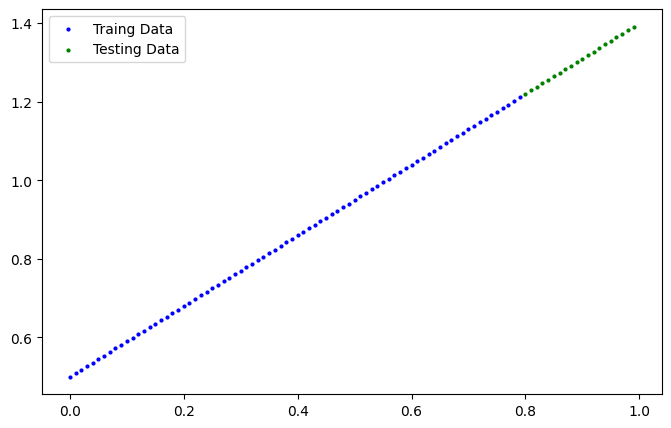

In [9]:
plot_predictions();

## 3.Build model

Now we've got some data, let's buld a PyTorch model to analyze patterns and discern relationships within the training data and corresponding labels.

This model will be instrumental for making predictions on future test data.


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation



### PyTorch Model_Building Essentials

PyTorch has four main essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html).

We will focus on two for now and save the others for later use.


| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |


If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data




> **Resource:** See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


### Simple Linear Regression Model
Let's make a standard linear regression model using pure PyTorch.

In [10]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           dtype = torch.float,
                                           requires_grad = True)) # update the weight with gradient descent.
    self.bias = nn.Parameter(torch.randn(1,
                                           dtype = torch.float,
                                           requires_grad = True)) # update the bias with gradient descent.

  # Forward method for the computation of model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias           # linear regression formula (y = w*x+b)


### Getting Information Of The Model
Now we will create a model instance with the class we've made and check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [11]:
# set the manual seed , as we want to initialize nn.Parameter  radomly

torch.manual_seed(42)

# make the instance of the model
model_0  = LinearRegression()

# check the parameters (nn.Parameter(s)) of the model.

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state of the model by [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html).

In [12]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

We  got the `wieghts` amd `bias `.These weights are randonly initialized using  `torch.randn()`.

We will make the  model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

### Making Predictions using [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html)

For prediction we pass the test data `X_test` to the model and then check how closely it predicts to the testing labels `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.



In [13]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

We  used [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) for the inference.As the name suggests, `torch.inference_mode()` is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference).

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

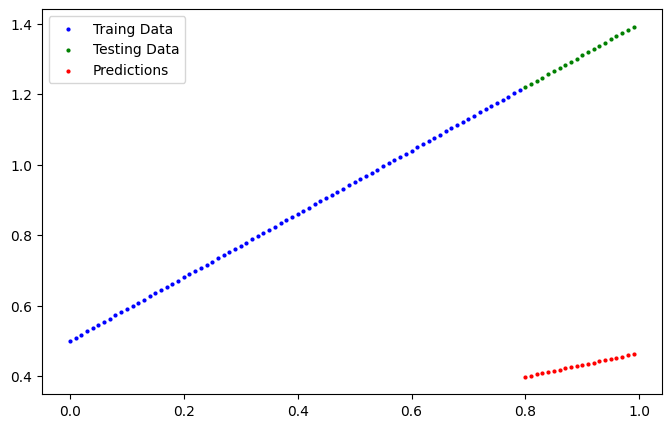

In [14]:
# Visualize the prediction.

plot_predictions(predictions=y_preds)

In [15]:
y_test - y_preds

tensor([[0.8218],
        [0.8275],
        [0.8331],
        [0.8387],
        [0.8444],
        [0.8500],
        [0.8556],
        [0.8613],
        [0.8669],
        [0.8725],
        [0.8782],
        [0.8838],
        [0.8894],
        [0.8951],
        [0.9007],
        [0.9063],
        [0.9120],
        [0.9176],
        [0.9232],
        [0.9289]])

These predictions look pretty bad. For these prediction, model just use the random numbers we have initialized.It hasn't even looked at the training data  to try to predict the labels.

Let's train the model on the training data to predict the labels.



## 3. Train model

Right now our model is making predictions using random parameters (we have initialzed with `nn.Parameter` and `torch.randn`) to make calculations, it's basically guessing (randomly).

To fix that, we will make our model to update these paramters to fit the data and for the correct predictions.

**Note** > We have ideal parameters as `weight =0.9` & `bias = 0.5`.

Much of the time you won't know what the ideal parameters are for a model.



### Creating a loss function and optimizer in PyTorch

We'll need to add **loss function** as well as an **optimizer** For our model to update its parameters on its own.


| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) w.r.t y_test | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

* Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

**Q:** Which loss function and optimizer should I use?

**A** This is problem specific,depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

Let's create a loss function and an optimizer we can use to help improve our model.





In [16]:
# Create the loss function
loss_fun = nn.L1Loss()   # MAE loss

# Create the Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), # Parameters of the model to optimize
                         lr = 0.01) # How much optimier takes step to lower the loss.

### Creating an Optimization Loops in PyTorch

 Now time to create a **training loop** and **testing loop**.

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).




### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |





### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calulate evaluation metrics (optional) | Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.



In [17]:
# setting the manual seed
torch.manual_seed(42)

# How many times the model will train (update the parameters)
epochs = 200

# create the empty list to store the values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  # set the training mode (default state of model)
  model_0.train()

  # 1. Forward Pass , Model will use the forward() method inside.
  y_pred = model_0(X_train)

  # 2. Finding the loss (how our prediction is differ from the )
  loss = loss_fun(y_pred, y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # Backpropogation > Find the gradient of loss w.r.t to parameters.
  loss.backward()

  # Step the optimizer (Perform the gradient descent )
  optimizer.step()


  ### Testing

  # Put the model in evalution mode
  model_0.eval()
  with torch.inference_mode():
    # Forward pass on the test data
    test_pred = model_0(X_test)

    # Finding the loss on the test data
    test_loss = loss_fun(test_pred , y_test)


    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        # Print out model state_dict()
        print(model_0.state_dict(),"\n")

Epoch: 0 | MAE Train Loss: 0.5936979055404663 | MAE Test Loss: 0.861817479133606 
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch: 10 | MAE Train Loss: 0.4780953526496887 | MAE Test Loss: 0.7264648675918579 
OrderedDict([('weight', tensor([0.3801])), ('bias', tensor([0.2388]))]) 

Epoch: 20 | MAE Train Loss: 0.3624928891658783 | MAE Test Loss: 0.591112494468689 
OrderedDict([('weight', tensor([0.4196])), ('bias', tensor([0.3388]))]) 

Epoch: 30 | MAE Train Loss: 0.24689047038555145 | MAE Test Loss: 0.45576006174087524 
OrderedDict([('weight', tensor([0.4591])), ('bias', tensor([0.4388]))]) 

Epoch: 40 | MAE Train Loss: 0.13586443662643433 | MAE Test Loss: 0.32423368096351624 
OrderedDict([('weight', tensor([0.4986])), ('bias', tensor([0.5351]))]) 

Epoch: 50 | MAE Train Loss: 0.08506610989570618 | MAE Test Loss: 0.2352665215730667 
OrderedDict([('weight', tensor([0.5343])), ('bias', tensor([0.5921]))]) 

Epoch: 60 | MAE Train Loss: 0.06944121420383453 | 

Let have a look how our loss goes down.

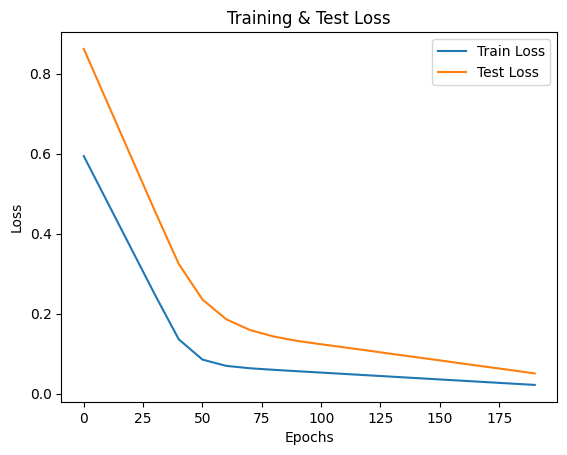

In [18]:
# Plot the loss curves

plt.plot(epoch_count, train_loss_values , label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training & Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


Check the model parameters with [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) to see see how close our model gets to the original values we set for weights and bias.

In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8086])), ('bias', tensor([0.5386]))])

## 5.Making Predictions With Trained PyTorch Model (Inference)


There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`).
2. Predict using  inference mode context manager (`with torch.inference_mode(): ...`).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

First two things are necessay in training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [20]:
# set the modelto evalution mode
model_0.eval()

# setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.1854],
        [1.1935],
        [1.2016],
        [1.2097],
        [1.2178],
        [1.2259],
        [1.2339],
        [1.2420],
        [1.2501],
        [1.2582],
        [1.2663],
        [1.2744],
        [1.2825],
        [1.2905],
        [1.2986],
        [1.3067],
        [1.3148],
        [1.3229],
        [1.3310],
        [1.3391]])

Nice! We've made some predictions with our trained model, now how do they look?

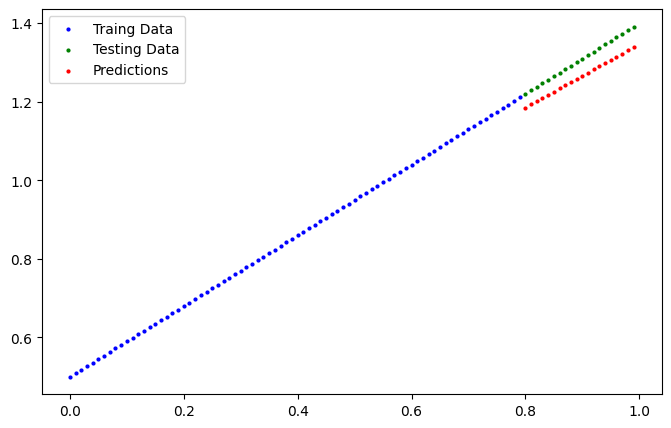

In [21]:
plot_predictions(predictions=y_preds)

## 6.Saving & Loading a PyTorch model



For saving and loading models in PyTorch, there are three main methods you should be aware of [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**.


### Saving a PyTorch Model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the whole model)* is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after refactors.


In [22]:
from pathlib import Path


# Create the directory for saving the model
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# File Name
MODEL_NAME = "2#pytorch_workflow_model_0.pth"
# Path where we want to save the model
MODEL_SAVE_PATH =  MODEL_PATH/MODEL_NAME


# Save the model state dict
print("Saving the Model to ",MODEL_SAVE_PATH)
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)


Saving the Model to  model/2#pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).




In [23]:
# Make the new  instance of the model
loaded_model_0 = LinearRegression()


loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>


Now to test our loaded model, let's perform inference with it (make predictions) on the test data.

In [24]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [72]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.Putting it All Together

Let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [1]:
# importing Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt


Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll default to `device="cpu"`.



In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6.1 Data

Let's create some data just like before.

We'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).

In [3]:
# specify the weight and bias
weight = 0.9
bias  = 0.5

# lets make the X values

X = torch.arange(start = 0 , end = 1 , step = 0.01).reshape(100,1)
y =  weight * X + bias


In [4]:
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.5000],
         [0.5090],
         [0.5180],
         [0.5270],
         [0.5360],
         [0.5450],
         [0.5540],
         [0.5630],
         [0.5720],
         [0.5810]]))

### 6.2 Train & Test Split

We will split the data into traing = 80% & test = 20%

In [5]:
train_split = int(0.8 *len(X))

X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]


len(X_train) ,len(y_train) ,len(X_test) ,len(y_test)

(80, 80, 20, 20)

Excellent, let's visualize them to make sure they look okay.

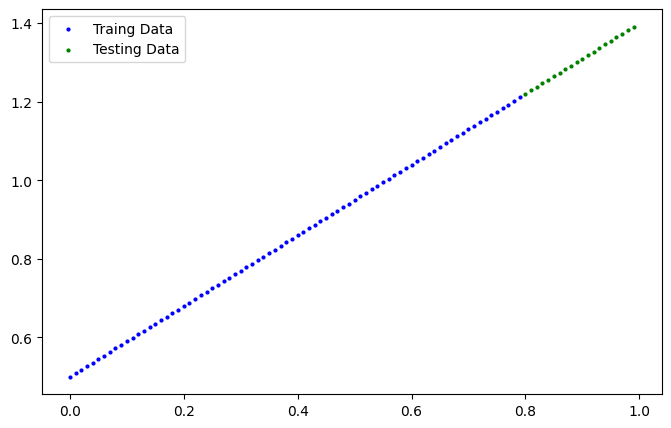

In [8]:
plot_predictions()

### 6.2 Building a PyTorch Linear Model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

> In our case `in_features` is equal to 1 , & also `out_features` also equla to 1

In [9]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Linear layer for the forward pass
    self.linear = nn.Linear(in_features = 1,
                            out_features= 1)

  # define the forward method
  def forward(self,x):
    return self.linear(x)

In [10]:
# lets have instance of the model

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1

LinearRegressionModelV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
list(model_1.parameters()),  model_1.state_dict()

([Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)],
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

Let's have a look on the device of the model.

In [12]:
next(model_1.parameters()).device

device(type='cpu')

Let's change it to be on the GPU (if it's available).

we can do this by `to.device()` method.

In [13]:
  # set the model to GPU

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

Nice! Because of our device agnostic code, the above cell will work regardless of whether a GPU is available or not.

If you do have access to a CUDA-enabled GPU, you should see an output of something like:

```
device(type='cuda', index=0)
```

### 6.3 Training


Peform this step .....



*   Creating loss function `nn.L1Loss()` and an optimizer `optim.SGD()`.
*   Training and Testing loop.








In [14]:
# Specify the loss function
loss_fun = nn.L1Loss()

# Creat the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)



The only different thing we'll be doing in training and testing loop compared to the previous training loop is putting the data on the target `device`.




In [15]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data on the (available)(GPU,CPU) device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    # training mode
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fun(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fun(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.2765006422996521 | Test loss: 0.19523465633392334
Epoch: 10 | Train loss: 0.16089823842048645 | Test loss: 0.0598822645843029
Epoch: 20 | Train loss: 0.05803891643881798 | Test loss: 0.060963183641433716
Epoch: 30 | Train loss: 0.04318768531084061 | Test loss: 0.0891447588801384
Epoch: 40 | Train loss: 0.039210300892591476 | Test loss: 0.08915393799543381
Epoch: 50 | Train loss: 0.03576306626200676 | Test loss: 0.08219867199659348
Epoch: 60 | Train loss: 0.032336048781871796 | Test loss: 0.07455109804868698
Epoch: 70 | Train loss: 0.02890903130173683 | Test loss: 0.0669034942984581
Epoch: 80 | Train loss: 0.025482013821601868 | Test loss: 0.05925590544939041
Epoch: 90 | Train loss: 0.02205597423017025 | Test loss: 0.05126434564590454
Epoch: 100 | Train loss: 0.018629929050803185 | Test loss: 0.04327277094125748
Epoch: 110 | Train loss: 0.015204858966171741 | Test loss: 0.03493723273277283
Epoch: 120 | Train loss: 0.011778819374740124 | Test loss: 0.026945669203

In [16]:

model_1.state_dict() , (weight , bias)

(OrderedDict([('linear.weight', tensor([[0.8913]], device='cuda:0')),
              ('linear.bias', tensor([0.4963], device='cuda:0'))]),
 (0.9, 0.5))


### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [17]:
# put the model on the eval mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds


tensor([[1.2093],
        [1.2182],
        [1.2271],
        [1.2360],
        [1.2449],
        [1.2538],
        [1.2627],
        [1.2716],
        [1.2806],
        [1.2895],
        [1.2984],
        [1.3073],
        [1.3162],
        [1.3251],
        [1.3340],
        [1.3429],
        [1.3519],
        [1.3608],
        [1.3697],
        [1.3786]], device='cuda:0')

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your target tensor to return a copy of your target tensor on the CPU.

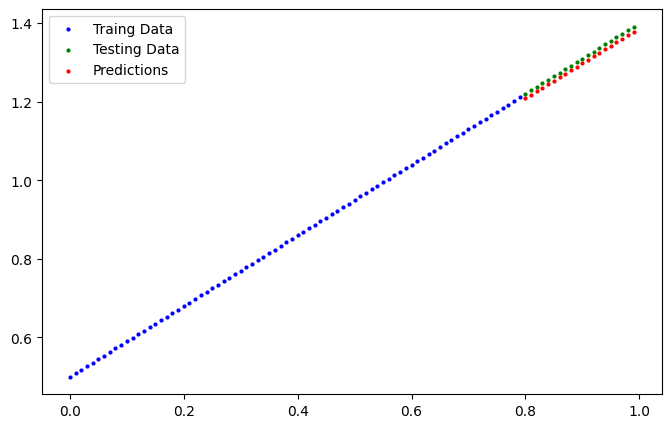

In [18]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it

X_train = X_train.cpu()
X_test = X_test.cpu()
y_train = y_train.cpu()
y_test = y_test.cpu()
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a model




In [19]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Model Name
MODEL_NAME = "1#pytorch_workflow_model_1.pth"
# 2. Create model save path
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/1#pytorch_workflow_model_1.pth


In [20]:
# New instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device(GPU)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [21]:
# Put data on the (available)(GPU,CPU) device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [22]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')